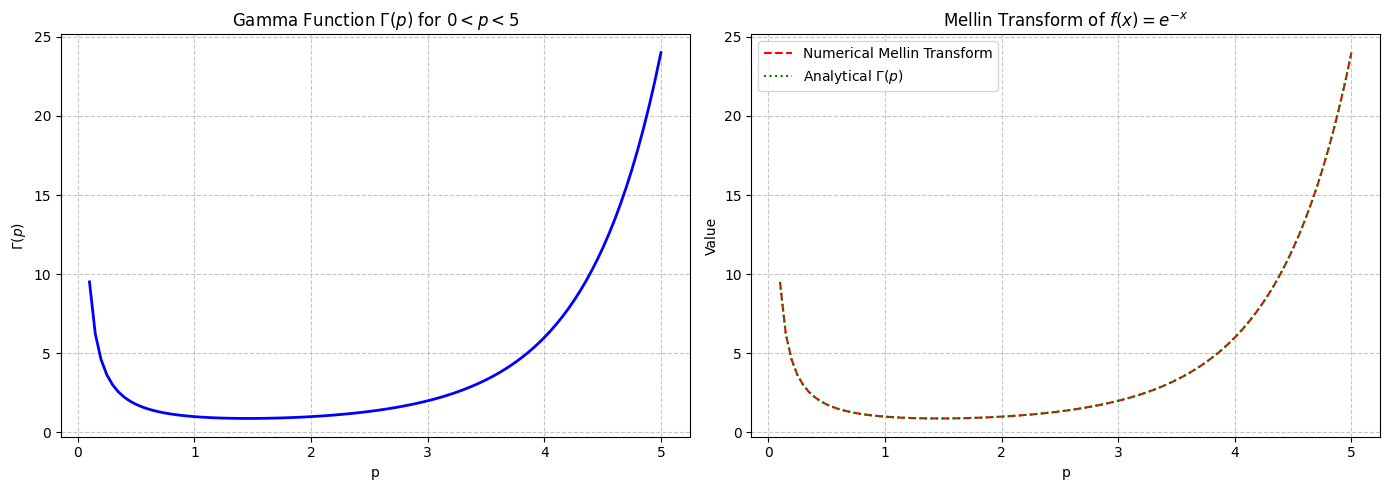

In [16]:
import numpy as np
import scipy.integrate as integrate
from scipy.special import gamma
import matplotlib.pyplot as plt



# Define Mellin transform for f(x) = e^(-x)
def mellin_transform(f, p):
    return integrate.quad(lambda x: x**(p-1) * f(x), 0, np.inf)[0]

# Define the exponential function
def f(x):
    return np.exp(-x)

# Generate p values (avoid p=0 due to gamma function pole)
p_values = np.linspace(0.1, 5, 100)

# Compute values
gamma_vals = gamma(p_values)
mt_vals = [mellin_transform(f, p) for p in p_values]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot gamma function
ax1.plot(p_values, gamma_vals, 'b-', linewidth=2)
ax1.set_title(r'Gamma Function $\Gamma(p)$ for $0 < p < 5$')
ax1.set_xlabel('p')
ax1.set_ylabel(r'$\Gamma(p)$')
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot Mellin transform vs analytical solution
ax2.plot(p_values, mt_vals, 'r--', label='Numerical Mellin Transform')
ax2.plot(p_values, gamma_vals, 'g:', label=r'Analytical $\Gamma(p)$')
ax2.set_title(r'Mellin Transform of $f(x) = e^{-x}$')
ax2.set_xlabel('p')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()